<a href="https://colab.research.google.com/github/Geon27/3-2-googlecolab/blob/main/incheon0427data_22_05_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인천데이터 기초통계 분석

## 코랩에서 R을 하도록 기본셋팅

rpy2패키지 활성화를 통해 코랩에서 R작업 가능

In [ ]:
# Load in the r magic
%reload_ext rpy2.ipython
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'

In [ ]:
# 3.패키지 자동설치 자동로드1
%%R
if (!require(pacman)) {install.packages("pacman")
   library(pacman)}
pacman::p_load("report", "sjmisc","dplyr","Hmisc","gmodels","equatiomatic","stargazer","lawstat",
               "scatterplot3d","stats","gvlma","car")
    #"corrplot", "stargazer", "plotly", "openxlsx","ggplot2", #  "lazyeval"
     #     "readxl","dplyr","htmltools", "sjmisc","lawstat","report",
      #    "lawstat","Hmisc") # "webr","moonBook",

R[write to console]: Loading required package: pacman

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/pacman_0.5.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 274400 bytes (267 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: 

코랩과 구글 드라이브의 연결, 데이터의 로드와 분석결과의 저장을 위해서

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

# 아래 출력되는 URL에 접속하여 이용 동의 후 생성되는 인증코드를 복사해서 붙여넣기

## 데이터 로드

In [ ]:
%%R
incheon0427 <- read.csv("/content/drive/MyDrive/incheon_resort_test.csv")

In [ ]:
%%R
head(incheon0427)

데이터의 크기를 행과 열의 순으로 보여줌

In [ ]:
%%R
dim(incheon0427)

### iris데이터를 토한 report 패키지의 이해

In [ ]:
%%R
report_text(iris$Sepal.Length)

In [ ]:
%%R
str(iris)

iris내장데이터셋에 대한 report테스트

In [ ]:
%%R
report(iris)

다시 인천데이터에 대해서 556개의 행과 30개의 열이 있음을 알 수 있음

In [ ]:
%%R
print(nrow(incheon0427)); print(ncol(incheon0427))

In [ ]:
%%R
dim_df=dim(incheon0427)
#print(str(dim_df))
print(dim_df[1])
print(dim_df[2])

In [ ]:
%%R
cat("행의 갯수는",nrow(incheon0427),"개이다")

In [ ]:
%%R
cat("열의 갯수는",ncol(incheon0427),"개이다")

현재 로드된 데이터셋내의 변수명을 보여줌

In [ ]:
%%R
names(incheon0427)

In [ ]:
%%R
str(incheon0427)

## 데이터 변환

필요에 의해(분석목적에 의해) 비슷한 변수는 요인화(평균)하고 원래 질적변수로 로드되어야 하는 변수들을 질적변수로 만들어줌

변수명 변경


In [ ]:
%%R
incheon0427_ex = incheon0427
head(incheon0427_ex)

In [ ]:
%%R
names(incheon0427_ex) 

In [ ]:
%%R
table(incheon0427_ex$gender)

In [ ]:
%%R
str(incheon0427_ex)

## 기술통계

### 양적변수의 질적변수화

분석상 질적변수여야 하는데 데이터 로드시 양적변수로 로드된 변수들에 대하여 질적변수로 바꾸고 빈도분석 실시

In [ ]:
%%R
incheon0427_ex$visit_bi <- factor(as.numeric(incheon0427_ex$visit_bi), labels=c('방문예정','방문비예정'))
#table(Dataset$gender)
frq(incheon0427_ex$visit_bi, out = "v")

In [ ]:
%%R
report(incheon0427_ex$visit_bi)

In [ ]:
%%R
incheon0427_ex$gender <- factor(as.numeric(incheon0427_ex$gender), labels=c('남자','여자'))
#table(Dataset$gender)
frq(incheon0427_ex$gender, out = "v")

In [ ]:
%%R
table(incheon0427_ex$prior_develop)
incheon0427_ex$prior_develop <- factor(as.numeric(incheon0427_ex$prior_develop), labels=c('개발사전인지','개발사전비인지'))
#table(Dataset$gender)
frq(incheon0427_ex$prior_develop, out = "v")

In [ ]:
%%R
table(incheon0427_ex$int_visit)
incheon0427_ex$int_visit <- factor(as.numeric(incheon0427_ex$int_visit), labels=c('예','아니오'))
#table(Dataset$gender)
frq(incheon0427_ex$int_visit, out = "v")

In [ ]:
%%R
incheon0427_ex$age_cate<- rec(incheon0427_ex$age, rec = "min:29=1; 30:39=2; 40:49=3; 50:59=4; 60:max=5")
incheon0427_ex$age_cate <- factor(as.numeric(incheon0427_ex$age_cate), labels=c('20대','30대','40대','50대','60대이상'))
frq(incheon0427_ex$age_cate, out = "v")

In [ ]:
%%R
report(incheon0427_ex)

In [ ]:
%%R
str(incheon0427_ex)

In [ ]:
%%R
table(incheon0427_ex$age_cate)

In [ ]:
%%R
which.max(table(incheon0427_ex$age_cate))

In [ ]:
%%R
which.min(table(incheon0427_ex$age_cate))

### 양적변수의 요약

In [ ]:
%%R
tar_vars=select(incheon0427_ex,select=c(pos_eco1,pos_eco2,pos_eco3))
print(apply(tar_vars,2,summary))
incheon0427_ex$pos_eco_avg=rowMeans(tar_vars, na.rm=TRUE)
print(summary(incheon0427_ex$pos_eco_avg))

데이터 로드시 형성된 3개의 긍정적 경제인식 변수들(pos_eco1,pos_eco2,pos_eco3)의 개별 요약통계치(평균포함)을 구하고 3개의 변수들 평균인 변수(pos_eco_avg)에 대한 평균을 추가로 도출함

In [ ]:
%%R
tar_vars=select(incheon0427_ex,select=c(neg_eco1,neg_eco2,neg_eco3))
print(apply(tar_vars,2,summary))
incheon0427_ex$neg_eco_avg=rowMeans(tar_vars, na.rm=TRUE)
print(summary(incheon0427_ex$neg_eco_avg))

In [ ]:
%%R
tar_vars=select(incheon0427_ex,select=c(pos_soc1,pos_soc2,pos_soc3))
print(apply(tar_vars,2,summary))
incheon0427_ex$pos_soc_avg=rowMeans(tar_vars, na.rm=TRUE)
print(summary(incheon0427_ex$pos_soc_avg))

In [ ]:
%%R
tar_vars=select(incheon0427_ex,select=c(neg_soc1,neg_soc2,neg_soc3))
print(apply(tar_vars,2,summary))
incheon0427_ex$neg_soc_avg=rowMeans(tar_vars, na.rm=TRUE)
print(summary(incheon0427_ex$neg_soc_avg))

In [ ]:
%%R
tar_vars=select(incheon0427_ex,select=c(pos_env1,pos_env2,pos_env3))
print(apply(tar_vars,2,summary))
incheon0427_ex$pos_env_avg=rowMeans(tar_vars, na.rm=TRUE)
print(summary(incheon0427_ex$pos_env_avg))

In [ ]:
%%R
tar_vars=select(incheon0427_ex,select=c(neg_env1,neg_env2,neg_env3))
print(apply(tar_vars,2,summary))
incheon0427_ex$neg_env_avg=rowMeans(tar_vars, na.rm=TRUE)
print(summary(incheon0427_ex$neg_env_avg))

In [1]:
%%R
tar_vars=select(incheon0427_ex,select=c(sup1,sup2,sup3))
print(apply(tar_vars,2,summary))
incheon0427_ex$sup_avg=rowMeans(tar_vars, na.rm=TRUE)
print(summary(incheon0427_ex$sup_avg))

UsageError: Cell magic `%%R` not found.


In [ ]:
%%R
names(incheon0427_ex)

분석에 사용될 질적변수만 따로 추출하여 빈도분석, apply함수는 여러변수에 대해서 분석을 편하게 하기 위해서 사용되는 함수인데 여기서 "2"는 계산의 방향이 열방향임을 뜻함

In [ ]:
%%R
cate_vars = subset(incheon0427_ex,select=c(visit_bi,gender,prior_develop,int_visit,age_cate))
apply(cate_vars,2,frq)

양적변수에 대해서는 빈도분석이 아니라 요약통계량 값을 제시

In [ ]:
%%R
num_vars = select(incheon0427_ex, contains('_avg'))
#num_vars = subset(incheon_resort_test,select=c(pos_eco_avg,neg_eco_avg,prior_develop,int_visit,age_cate))
apply(num_vars,2,summary)

전체 데이터셋의 각 변수에 대한 타입을 확인

In [ ]:
%%R
type<-sapply(incheon0427_ex,class); type=as.data.frame(type)
type

integer는 정수인 양적변수, numeric은 소수점을 포함하는 상수인 양적변수, factor는 질적변수를 의미

질적변수들에 대한 변수타입 확인

In [ ]:
%%R
type<-sapply(cate_vars,class); type=as.data.frame(type)
type

In [ ]:
%%R
names(cate_vars)

In [ ]:
%%R
names(num_vars)

In [ ]:
%%R
analy_dataset = cbind(num_vars,cate_vars)
head(analy_dataset)

## 추리통계

### 회귀분석: 변수(들)이 하나의 종속변수에 미치는 영향력을 보기 위한 분석, 독립변수와 종속변수 모두 양적변수

#### 단순회귀분석: 독립변수가 1개(pos_eco_ave), 종속변수(sup_avg)

lm함수를 통해 회귀분석 실시, `~`을 기준으로 왼쪽이 종속변수 오른쪽이 독립변수임

In [ ]:
%%R
mod1=lm(sup_avg ~ pos_eco_avg, data=num_vars)
summary(mod1)

In [ ]:
%%R
stargazer(mod1, type = "text", report = "vct*", star.cutoffs = c(0.05, 0.01, 0.001),
          column.labels = c("coef"), 
          single.row = TRUE)

In [ ]:
%%R
report(mod1)

pos_eco_avg(공식: sup_avg ~ pos_eco_avg)를 사용하여 sup_avg를 예측하기 위해 선형 모델(OLS를 사용하여 추정)을 장착했습니다. 이 모델은 통계적으로 유의하고 상당한 분산 비율을 설명합니다(R2 = 0.33, F(1, 554) = 274.92, p < .001, 수정 R2 = 0.33). pos_eco_avg = 0에 해당하는 모델의 절편은 1.07(95% CI [0.81, 1.33], t(554) = 8.11, p < .001)에 있습니다. 이 모델 내에서:

  - pos eco avg의 효과는 통계적으로 유의하고 긍정적입니다(베타 = 0.61, 95% CI [0.54, 0.68], t(554) = 16.58, p < .001; 표준 베타 = 0.58, 95% CI [0.51, 0.64])

표준화된 버전의 데이터 세트에 모델을 피팅하여 표준화된 매개변수를 얻었습니다. 95% 신뢰구간(CI) 및 p-값은 Wald 근사치를 사용하여 계산되었습니다.]

그래프 참고자료: https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=coder1252&logNo=220945697182

In [ ]:
%%R
ggplot(num_vars, aes(pos_eco_avg, sup_avg))+geom_point()

In [ ]:
%%R
mean_y=mean(num_vars$sup_avg)
mean_y

In [ ]:
%%R
ggplot(num_vars, aes(pos_eco_avg, sup_avg))+geom_point() +
geom_hline(yintercept=mean_y, linetype='dashed', color='red', size=1)

In [ ]:
%%R
ggplot(num_vars, aes(pos_eco_avg, sup_avg))+geom_point() +
geom_hline(yintercept=mean_y, linetype='dashed', color='red', size=1) +
geom_abline(intercept= 1.072, slope=0.612, color='blue', size = 1.5)

In [ ]:
%%R
equatiomatic::extract_eq(mod1, use_coefs = TRUE)

$$
\operatorname{\widehat{sup\_avg}} = 1.07 + 0.61(\operatorname{pos\_eco\_avg})
$$

#### 다중회귀분석: 독립변수(pos_eco_avg, pos_soc_avg), 종속변수(sup_avg)

In [ ]:
%%R
mod2=lm(sup_avg ~ pos_eco_avg+pos_soc_avg, data=num_vars)
summary(mod2)

In [ ]:
%%R
stargazer(mod2, type = "text", report = "vct*", star.cutoffs = c(0.05, 0.01, 0.001),
          column.labels = c("coef"), 
          single.row = TRUE)

In [ ]:
%%R
report(mod2)

In [ ]:
%%R
equatiomatic::extract_eq(mod2, use_coefs = TRUE)

$$
\operatorname{\widehat{sup\_avg}} = 0.51 + 0.41(\operatorname{pos\_eco\_avg}) + 0.4(\operatorname{pos\_soc\_avg})
$$

https://www.dataquest.io/blog/statistical-learning-for-predictive-modeling-r/

In [ ]:
%%R
library(base)
pos_eco_avg <- seq(1,5, by=1) ## make a girth vector
pos_soc_avg <- seq(1,5, by=1) ## make a height vector
pred_grid <- expand.grid(pos_eco_avg = pos_eco_avg, pos_soc_avg = pos_soc_avg)
pred_grid
## make a grid using the vectors

In [ ]:
%%R
pred_grid$Volume2 <-predict(mod2, new = pred_grid)

In [ ]:
%%R
fit_2_sp <- scatterplot3d(pred_grid$pos_eco_avg , pred_grid$pos_soc_avg , pred_grid$Volume2,
                          angle = 60, color = "dodgerblue", pch = 1, ylab = "pos_soc_avg", xlab = "pos_eco_avg", zlab = "sup_avg" )

In [ ]:
# %%R
# fit_2_sp$points3d(num_vars$pos_eco_avg, pos_soc_avg$Height, num_vars$sup_avg, pch=16)

#### 최적의 다중회귀분석

현재 우리는 num_var데이터셋 내에서 sup_avg라는 종속변수에 대해서 6개의 독립변수가 존재하고 있음  
그런데 6개의 변수를 동시에 고려하는 것은 쉽지 않음. 어떠한 통계적 방법과 연구자의 직관에 따라 중요한 독립변수를 추출하는 것이 중요함

 모든 변수에 대한 회귀분석

회귀식 설정에서 `.`이 의미하는 것은 모든 독립변수

In [ ]:
%%R
model_all = lm(sup_avg ~ .,data=num_vars)
summary(model_all)

stepwise방법에 의한 중요한 독립변수만 도출

In [ ]:
%%R
mod_stepwise = step(model_all,direction="both")

In [ ]:
%%R
summary(mod_stepwise)

In [ ]:
%%R
#model_opti = lm(sup_avg ~ pos_eco_avg + pos_soc_avg + neg_soc_avg + pos_env_avg + neg_env_avg ,data=num_vars)
model_opti = lm(sup_avg ~ . - neg_eco_avg, data=num_vars)
summary(model_opti)

다중공선성 점검: https://mindscale.kr/course/basic-stat-r/collinearity/  
다중공선성은 독립변수들끼리 연관성이 매우 높아서 회귀분석의 결과가 왜곡되는 현상을 의미함

In [ ]:
%%R
vif(model_opti)

car package의 vif는 GVIF(generalized variance inflation factor), df(number of coefficients in the subset)을 출력한다. 이를테면 다음과 같다. 이때 GVIF^(1/(2*df)) > 2인 독립변인은 다중공선성이 있다고 간주하여, 가장 그 값이 큰 변인부터 하나씩 제거해야 한다. 하나씩 제거하는 이유는 한 변인이 제거됨으로써 다른 변인들의 다중공선성이 감소하기 때문이다.  

*만약 VIF 지표만 출력된다면, 10을 넘었을 때 다중공선성이 있다고 판단한다.

대처  
- 계수가 통계적으로 유의미하지 않다면 대처
  - 계수가 통계적으로 유의미하다면 VIF가 크더라도 특별히 대처할 필요없음
변수들을 더하거나 빼서 새로운 변수를 만든다
  - (개념적으로나 이론적으로) 두 예측변수를 더하거나 빼더라도 문제가 없는 경우
  - 예) 남편의 수입과 아내의 수입이 서로 상관이 높다면, 두 개를 더해 가족 수입이라는 하나의 변수로 투입한다
- 더하거나 빼기 어려운 경우는 변수를 모형에서 제거한다
단, 변수를 제거하는 것은 자료의 다양성을 해치고, 분석하려던 가설이나 이론에 영향을 미칠 수 있기 때문에 가급적 자제

가정의 확인: 회귀분석은 보통 최소자승법에 의해 도출되는데 이 방법은 비교적 좋은 결과를 도출한다고 알려져 있음. 다만 최소자승법에 의한 가정이 만족되는 경우에

- ref : http://r-statistics.co/Assumptions-of-Linear-Regression.html
  - 위의 링크는 조금 더 많은 가정을 체크하지만, 일단 아래 네개정도만 봐도 헉헉이라 
- Assumptions
  - 정규성(Normality) 
  - 독립성(Independence) 
  - 선형성(Linearity) 
  - 등분산성(Homoscedasticity)
- 일단 종합 검진 gvlma
  - ref : https://cran.r-project.org/web/packages/gvlma/gvlma.pdf
  - Global Stat 값을 보면되는데, 이 값이 통과과 되지 않는다고 하면, 뭐가 문제인지 하나하나 봐야한다. p-value가 0.05보다 작으면 가정 불만족

Global stat: 선형성(종속 변인과 독립 변인들 간 선형적 관계가 나타나는가?), 일부는 이를 전반적 지표로 받아들이기도 한다.  
Skewness, Kurtosis: 왜도와 첨도 -> 잔차의 정규성을 나타내는 지표  
Link Function: 종속변인이 정확히 연속형(continuous) 변수인가?  
Heteroscedasticity: 이분산성(등분산성의 반의어)  

In [ ]:
%%R
gvmodel<-gvlma(model_opti)
summary(gvmodel)

Global Stat와 Link Function은 linearity 가정이 충족되었는지를 보여주며, 그렇지 않다면 (X에 대한) data transformation을 하거나 회귀처럼 선형 모델이 아닌 비선형 모델을 사용해보는 방법이 있다.
Skewness와 Kurtosis는 잔차의 normality 가정이 충족되었는지를 보여주며, 그렇지 않다면 Y에 대한 data transformation을 해야 할 수 있다. 
Heteroscedasticity는 constant variance 가정이 충족되었는지를 보여준다.

gvlma를 이용하면 간편하기는 하지만, statistical testing 기법이 갖는 한계점처럼 유의수준 0.05에서 [가정 충족 || 가정 충족하지 않음]의 경계를 잘라 버리다 보니 융통성이 부족하다는 점이 있다. 선형회귀는 이런 가정 충족에 대해서 비교적 robust 한 편이다 보니 이 결과만 보고 비선형적 모델로 바로 넘어가는 등의 속단은 위험할 수 있다고 생각한다. 

Heteroscedasticity(이분산)의 경우 p-value가 7.597e-01로서 0.05보다 커서 귀무가설 채택
   - 귀무가설: 잔차가 등분산임(p-value가 0.05보다 큰 경우)
   - 연구가설: 잔차가 이분산임(p-value가 0.05보다 작은 경우)

In [ ]:
%%R
## 독립성(Independence) : 종속 변수의 독립성 검정 
##                  ( 시계열 데이터에서 짧은 간격으로 수집된 데이터등에서는, 높은 자기상관을 가질 수 있음 )
# 그래프로는 확인이 안되고 별도의 함수를 사용하자. 
# H1 이 자기상관 ( Alternative hypothesis: rho != 0 )
# 높은 자기상관을 갖는 경우, Cochrane - Orcutt 방법과 Prais - winsten 방법을 사용한다. 
#dwtest(model_opti)
durbinWatsonTest(model_opti)

Autocorrelation(자기상관)의 경우 p-value가 0.436로서 0.05보다 커서 귀무가설 채택
   - 귀무가설: 잔차가 자기상관이 아님(p-value가 0.05보다 큰 경우)
   - 연구가설: 잔차가 자기상관임(p-value가 0.05보다 작은 경우)
  

귀무가설이 우리에게 유리한 것이기 때문에 p-value는 0.05보다 커야함

여러가지 검증중에서도 계량경제학 분야에서는 자기상관(dwtest)과 이분산(heteroscedasticity)을 중요하게 생각함

잔차도출: 실제값 - 추정(예측값)

In [ ]:
%%R
model_opti$residual[1:10]

In [ ]:
%%R
shapiro.test(model_opti$residual)

In [ ]:
%%R
num_vars$sup_avg[1:10]

In [ ]:
%%R
names(model_opti)

In [ ]:
%%R
model_opti$fitted.values[1:10]

### 연관성분석: 변수A와 B가 얼마나 서로 관계가 있느냐?  

*   교차분석: 질적변수간의 관계
*   상관분석: 양적변수간의 관계

#### 교차분석  
□ 질적변수(성별, 소득, 직업), 질적변수(성별, 소득, 직업): 성별-직업

In [ ]:
%%R
# 교차분석 그래프 그리기와 통계분석
# 교차분석 ct1, ct2 변수할당
incheon0427_ex$ct1=incheon0427_ex$gender; incheon0427_ex$ct2=incheon0427_ex$prior_develop
# 추리통계학으로 확인하기
CrossTable(incheon0427_ex$ct1, incheon0427_ex$ct2)
mytable<-xtabs( ~ ct1+ct2,data=incheon0427_ex)
chisq.test(mytable) 

* ct1은 성별(1:남자, 2:여자)을 ct2는 개발이전에 복합리조트 인지(1: 이전에 알고 있었음, 2: 이전에 모르고 있었음)를 얘기해 줌
* 전체적으로 남자는 274명(49.3%), 여자는 282명(50.7%)로 여자가 약간 많음
전체적으로 이전에 알고 있었던 사람은 262명(47.1%), 이전에 모르고 있었던 사람은 294명(52.9%)로 전에 알고 있었던 사람이 더 많음
* 남자의 경우 이전에 알고 있었던 사람은 150명으로 이전에 모르고 있었던 사람(124명)에 비해 많고, 여자의 경우 이전에 알고 있었던 사람은 112명으로 이전에 모르던 사람(170명)에 비해 적었음
* 이전에 알고 있었던 사람의 경우 남자가 150명으로 여자(112명)에 비해 많고, 이전에 알고 모르던 사람 경우에는 여자가 170명으로 남자(124명)에 비해 많았음
남자를 기준으로 이전에 알고 있었던 사람은 54.7%, 이전에 모르고 있었던 사람은 45.3%였음
* 여자를 기준으로 이전에 알고 있었던 사람은 39.7%, 이전에 모르고 있었던 사람은 60.3%였음
* 이전에 알고 있었던 사람을 기준으로 남자는 57.3%, 여자는 42.7%였음
* 이전에 모르고 있었던 사람을 기준으로 남자는 42.2%, 여자는 57.8%였음
* 전체를 기준으로 여자-개발사전비인지 (30.6%)로 가장 많았고 그 다음으로는 남자-이전에 알고 있었음(27%), 남자-이전에 모르고 있었음(22.3%), 여자-개발사전인지(20.1%)의 순으로 나타났음

* chisq.test() 함수를 이용한 교차분석의 결과를 보면, p-value(유의확률)가 0.0005319로 0.05보다 작아서 귀무가설을 기각하고 연구가설을 채택하여 성별과 개발이전에 복합리조트 인지 변수와는 통계적으로 유의한 연관성이 있다고 할 수 있음
  - 귀무가설: 성별과 개발이전에 복합리조트 인지 변수와는 통계적으로 유의한 연관성 없다(채택되려면 p-value가 0.05보다 커야 함)
  - 연구가설: 성별과 개발이전에 복합리조트 인지 변수와는 통계적으로 유의한 연관성 있다(채택되려면 p-value가 0.05보다 작아야 함)

#### 상관분석  
□ 양적변수(연령, 체류기간, 만족도), 양적변수(연령, 체류기간, 만족도): 체류기간-만족도

In [ ]:
%%R
# 상관분석 x1, x2 변수할당
incheon0427_ex$cor1=incheon0427_ex$pos_eco_avg
incheon0427_ex$cor2=incheon0427_ex$pos_soc_avg
# 그래프로 이해하기
ggplot(incheon0427_ex, aes(x=cor1, y=cor2)) + 
  geom_point(size = 3, color = "red")+ # 포인트색 설정: red(빨강)
  xlab(' ') +             # x축이름 설정
  ylab(' ')               # y축이름 설정

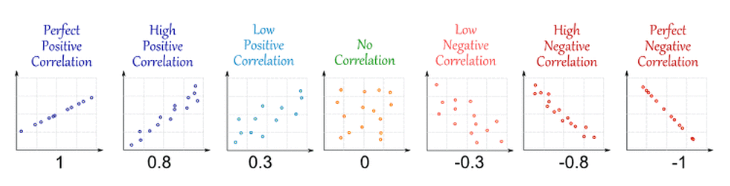

In [ ]:
%%R
# 추리통계학으로 확인하기
cor_test=cor.test(incheon0427_ex$cor1, incheon0427_ex$cor2)
cor_test

- Pearson 상관계수(r)는 0.554이고, 이에 대한 p-value는 2.2e-16(2.2를 기준으로 소수점이 왼쪽으로 16자리 이동을 의미, +일 경우 오른쪽으로 이동함을 뜻함)로서 기준이 되는 0.05보다 현저히 작은 값임 → 귀무가설 기각  
- 이때 p-value가 기준값(critical value, criteria)보다 작아서(귀무가설 기각) 내재되어 있는 귀무가설(모집단에서 상관계수가 0이다, true correlation is equal to 0)을 기각하여 연구가설(모집단에서 상관계수는 0이 아니다, true correlation is not equal to 0)을 채택하게 되므로 두 변수(긍정적 경제인식과 긍정적 사회인식)는 유의수준 0.05(95% 신뢰수준)에서 서로 상관관계(0.554)가 있다고 할 수 있음

In [ ]:
%%R
# Correlations
report(cor_test)
#report(res2)

`incheon0427_ex$cor1`과 `incheon0427_ex$cor2` 간의 Pearson 곱-모멘트 상관은 양의 값을 가지며 통계적으로 유의하며 매우 큽니다(r = 0.56, 95% CI [0.50, 0.61], t(554) = 15.72, p < .001).

  - 귀무가설: `incheon0427_ex$cor1`과 `incheon0427_ex$cor2`는 통계적으로 유의한 연관성 없다(채택되려면 p-value가 0.05보다 커야 함)
  - 연구가설: `incheon0427_ex$cor1`과 `incheon0427_ex$cor2`는 통계적으로 유의한 연관성 있다(채택되려면 p-value가 0.05보다 작아야 함)

## 차이분석: 질적 그룹변수에 따른 양적변수의 차이에 대한 추리통계

\### t-test: 질적 그룹변수의 카테고리가 2개인 경우

In [ ]:
%%R
### t-test
# if (!require(lawstat)) {install.packages("lawstat")
#   library(lawstat)}
print(lawstat::levene.test(analy_dataset$sup_avg, analy_dataset$gender,                             # 형식: 양적변수, 질적변수
            location = "mean", correction.method = "zero.correction"))

등분산 검증결과 p-value가 0.05보다 크므로 귀무가설 채택
  - 귀무가설: sup_avg가 성별에 대해서 등분산임
  - 연구가설: sup_avg가 성별에 대해서 등분산이 아님

In [ ]:
%%R
print(t.test(analy_dataset$sup_avg ~ analy_dataset$gender, var.equal=T))
#print(t.test(analy_dataset$sup_avg ~ analy_dataset$gender, var.equal=F))
report(t.test(analy_dataset$sup_avg ~ analy_dataset$gender, var.equal = TRUE))

`Analy_dataset$gender`(남자 그룹의 평균 = 3.28, 여자 그룹의 평균 = 3.16)에 의한 `analy_dataset$sup_avg`의 차이를 테스트하는 Two Sample t-test는 효과가 긍정적이고 통계적으로 유의하지 않으며 매우 작음을 시사합니다(차이 = 0.12 , 95% CI [-6.65e-03, 0.25], t(554) = 1.86, p = 0.063, Cohen의 d = 0.16, 95% CI [-8.70e-03, 0.32])

- 귀무가설: 성별에 따라 지지도의 차이는 (모집단에서) 존재하지 않음
- 연구가설: 성별에 따라 지지도의 차이는 (모집단에서) 존재함

### One-way Anova: 질적 그룹변수의 카테고리가 3개 이상인 경우

In [ ]:
%%R
print(tapply(analy_dataset$sup_avg,analy_dataset$age_cate,mean))
tapply(analy_dataset$sup_avg,analy_dataset$age_cate,sd)

In [ ]:
%%R
# 등분산 확인하는 방법
bartlett.test(sup_avg ~ age_cate, data=analy_dataset) # q3: 연령

In [ ]:
%%R
# 등분산 만족시
#incheon0427$q3=as.factor(incheon0427$q3)
round(tapply(analy_dataset$sup_avg,analy_dataset$age_cate,mean),3)
round(tapply(analy_dataset$sup_avg,analy_dataset$age_cate,sd),3)
anova<-aov(sup_avg ~ age_cate, data=analy_dataset)
print(summary(anova))

In [ ]:
%%R
report(anova)

ANOVA(공식: sup_avg ~ age_cate)는 다음을 제안합니다.

  - `age_cate`의 주효과는 통계적으로 유의하고 작음(F(4, 551) = 5.98, p < .001; Eta2 = 0.04, 95% CI [0.01, 1.00])

효과 크기는 Field(2013) 권장 사항에 따라 레이블이 지정되었습니다.

위의 결과에서 p-value가 0.05보다 작으므로 귀무가설 기각
- 귀무가설: 연령에 따라 지지도의 차이는 (모집단에서) 존재하지 않음
- 연구가설: 연령에 따라 지지도의 차이는 (모집단에서) 존재함

사후분석: 등분산 만족시

In [ ]:
%%R
# 사후분석
print(TukeyHSD(anova))

쌍대비교를 해본결과 통계적으로 유의한 차이가 나는 그룹은 50대-20대, 60대이상-20대, 50대-30대로 나타났음

실제결과는 등분산을 만족하지만 등분산을 만족하지 못한다고 가정하여 분석해보면

In [ ]:
%%R
# 등분산 불만족시
oneway.test(sup_avg ~ age_cate, data=analy_dataset) # 정규분포는 하나 등분산은 아닐 때

In [ ]:
%%R
posthocTGH <- function(y, x, method=c("games-howell", "tukey"),
                       conf.level = 0.95, digits=2,
                       p.adjust="none", formatPvalue = TRUE) {
  ### Based on http://www.psych.yorku.ca/cribbie/6130/games_howell.R
  method <- tolower(method);
  tryCatch(method <- match.arg(method), error=function(err) {
    stop("Argument for 'method' not valid!");
  });
  
  res <- list(input = as.list(environment()));
  
  res$intermediate <- list(x = factor(x[complete.cases(x,y)]),
                           y = y[complete.cases(x,y)]);
  res$intermediate$n <- tapply(y, x, length);
  res$intermediate$groups <- length(res$intermediate$n);
  res$intermediate$df <- sum(res$intermediate$n) - res$intermediate$groups;
  res$intermediate$means <- tapply(y, x, mean);
  res$intermediate$variances <- tapply(y, x, var);
  res$intermediate$names <- levels(res$intermediate$x)
  res$intermediate$pairNames <- combn(res$intermediate$groups,2,function(ij){
    paste0(rev(res$intermediate$names[ij]),collapse="-");
  })
  
  res$intermediate$descriptives <- cbind(res$intermediate$n,
                                         res$intermediate$means,
                                         res$intermediate$variances);
  rownames(res$intermediate$descriptives) <- levels(res$intermediate$x);
  colnames(res$intermediate$descriptives) <- c('n', 'means', 'variances');
  
  ### Start on Tukey
  res$intermediate$errorVariance <-
    sum((res$intermediate$n-1) * res$intermediate$variances) /
    res$intermediate$df;
  res$intermediate$se <- combn(res$intermediate$groups,2, function(ij) {
    sqrt(res$intermediate$errorVariance*sum(1/res$intermediate$n[ij]));
  } )
  res$intermediate$dmeans <- combn(res$intermediate$groups, 2, function(ij) {
    diff(res$intermediate$means[ij]) } )
  res$intermediate$t <- abs(res$intermediate$dmeans)/res$intermediate$se
  res$intermediate$p.tukey <- ptukey(res$intermediate$t*sqrt(2),
                                     res$intermediate$groups,
                                     res$intermediate$df,
                                     lower.tail=FALSE);
  res$intermediate$alpha <- (1-conf.level);
  res$intermediate$qcrit <- qtukey(res$intermediate$alpha,
                                   res$intermediate$groups,
                                   res$intermediate$df,
                                   lower.tail=FALSE) / sqrt(2);
  res$intermediate$tukey.low <- res$intermediate$dmeans - (res$intermediate$qcrit * res$intermediate$se);
  res$intermediate$tukey.high <- res$intermediate$dmeans + (res$intermediate$qcrit * res$intermediate$se);
  res$output <- list();
  res$output$tukey <- data.frame(res$intermediate$dmeans,
                                 res$intermediate$tukey.low,
                                 res$intermediate$tukey.high,
                                 res$intermediate$t,
                                 res$intermediate$df,
                                 res$intermediate$p.tukey)
  columnNames <- c('diff', 'ci.lo', 'ci.hi', 't', 'df', 'p');
  if (p.adjust != "none") {
    res$output$tukey$p.tukey.adjusted <- p.adjust(res$intermediate$p.tukey,
                                                  method = p.adjust);
    columnNames <- c(columnNames, 'p.adjusted');
  }

  rownames(res$output$tukey) <- res$intermediate$pairNames;
  colnames(res$output$tukey) <- columnNames;
  
  ### Start on Games-Howell
  res$intermediate$df.corrected <- combn(res$intermediate$groups, 2, function(ij) {               
    sum(res$intermediate$variances[ij] /
          res$intermediate$n[ij])^2 / 
      sum((res$intermediate$variances[ij] /
             res$intermediate$n[ij])^2 / 
            (res$intermediate$n[ij]-1));
  } )
  res$intermediate$se.corrected <- combn(res$intermediate$groups,2, function(ij) {
    sqrt(sum(res$intermediate$variances[ij]/res$intermediate$n[ij]));
  } )
  res$intermediate$t.corrected <- abs(res$intermediate$dmeans)/res$intermediate$se.corrected
  
  res$intermediate$qcrit.corrected <- 
    qtukey(res$intermediate$alpha,
           res$intermediate$groups,
           res$intermediate$df.corrected,
           lower.tail=FALSE) / sqrt(2)
  
  res$intermediate$gh.low <- res$intermediate$dmeans - 
    res$intermediate$qcrit.corrected*res$intermediate$se.corrected
  res$intermediate$gh.high <- res$intermediate$dmeans + 
    res$intermediate$qcrit.corrected*res$intermediate$se.corrected
  
  
  res$intermediate$p.gameshowell <- ptukey(res$intermediate$t.corrected*sqrt(2),
                                           res$intermediate$groups,
                                           res$intermediate$df.corrected,
                                           lower.tail=FALSE)  
  res$output$games.howell <- data.frame(res$intermediate$dmeans,
                                        res$intermediate$gh.low,
                                        res$intermediate$gh.high,
                                        res$intermediate$t.corrected,
                                        res$intermediate$df.corrected,
                                        res$intermediate$p.gameshowell);
  columnNames <- c('diff', 'ci.lo', 'ci.hi', 't', 'df', 'p');
  if (p.adjust != "none") {
    res$output$games.howell$p.gameshowell.adjusted <- p.adjust(res$intermediate$p.gameshowell,
                                                               method = p.adjust);
    columnNames <- c(columnNames, 'p.adjusted');
  }
  rownames(res$output$games.howell) <- res$intermediate$pairNames;
  colnames(res$output$games.howell) <- columnNames;
  
  ### Set class and return object
  class(res) <- 'posthocTGH';
  return(res);
  
}

In [ ]:
%%R
# 사후분석
#library(userfriendlyscience)
densityplot(sup_avg ~ age_cate, data=analy_dataset)
# posthocTGH(incheon0427$q3, y = incheon0427$q10, method = 'games-howell')
games_howell=posthocTGH(analy_dataset$age_cate, y = analy_dataset$sup_avg, method = 'games-howell')
print(games_howell$intermediate$descriptives)
print(games_howell$output$games.howell)

# pairwise.t.test(incheon0427$q10, incheon0427$q3,
#                  p.adjust.method = "BH", pool.sd = FALSE)